Month                               0
Day                                 0
Hour                                0
Beam Irradiance (W/m2)              0
Diffuse Irradiance (W/m2)           0
Ambient Temperature (C)             0
Wind Speed (m/s)                    0
Albedo                              0
Plane of Array Irradiance (W/m2)    0
Cell Temperature (C)                0
AC System Output (kW)               0
dtype: int64
Index(['Month', 'Day', 'Hour', 'Beam Irradiance (W/m2)',
       'Diffuse Irradiance (W/m2)', 'Ambient Temperature (C)',
       'Wind Speed (m/s)', 'Albedo', 'Plane of Array Irradiance (W/m2)',
       'Cell Temperature (C)', 'AC System Output (kW)'],
      dtype='object')
Epoch 1/100


/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


190/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202944.5156 - mae: 277.7533 - mse: 202942.5469

/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 202930.1406 - mae: 277.7107 - mse: 202928.1719 - val_loss: 190402.9531 - val_mae: 261.0323 - val_mse: 190401.0781 - learning_rate: 1.0000e-04
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206849.4844 - mae: 283.0076 - mse: 206847.6875 - val_loss: 186590.2812 - val_mae: 259.2489 - val_mse: 186588.5938 - learning_rate: 1.0000e-04
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200099.8281 - mae: 277.5436 - mse: 200098.1094 - val_loss: 182263.6094 - val_mae: 257.2119 - val_mse: 182261.9688 - learning_rate: 1.0000e-04
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198350.4375 - mae: 274.7654 - mse: 198348.7969 - val_loss: 177638.0781 - val_mae: 254.0190 - val_mse: 177636.4688 - learning_rate: 1.0000e-04
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191495.8281 - mae: 268.8295 - mse: 191494.2500 - val_loss: 172770.3125 - val_mae: 250.4060 - val_mse: 172768.7500 - learning_rate: 1.0000e-

/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/Users/kartikparasher/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Mean Squared Error (Transformer): [461.11773681640625, 459.4072570800781, 11.515239715576172]
R^2 Score (Transformer): 0.9962571677630877
MAPE (Transformer): 2260.4106314049905


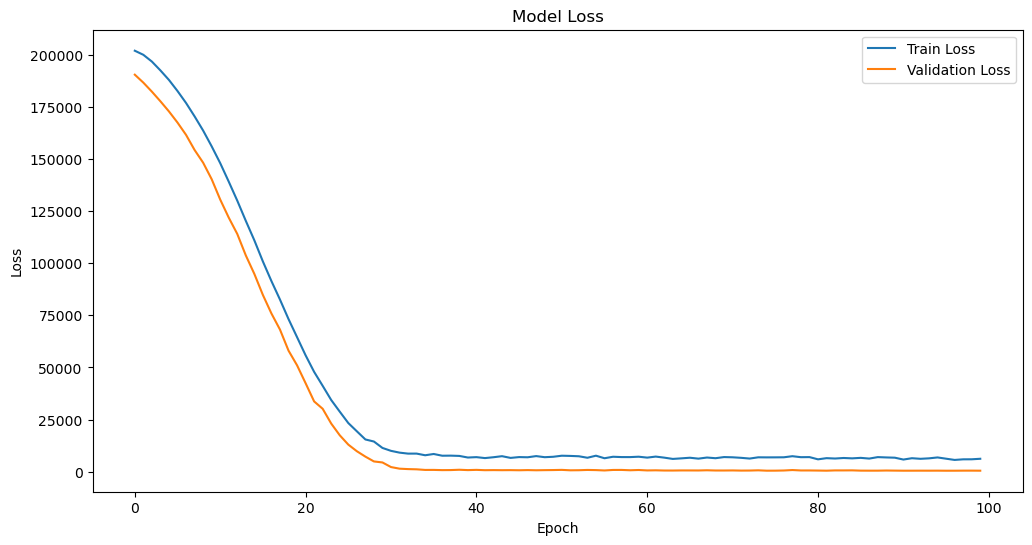

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted AC System Output (Transformer): 1141.1724853515625


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GaussianNoise, BatchNormalization, Input, LayerNormalization, MultiHeadAttention, Add, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import MaxNorm

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100

# Load the updated dataset
data = pd.read_csv('1.5MWfinal1.csv')

# Check for missing values
print(data.isnull().sum())
print(data.columns)

# Separate features and target variables
features = data.drop(columns=['AC System Output (kW)'])
target = data['AC System Output (kW)']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Reshape features for LSTM input (samples, time steps, features)
features_reshaped = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, target, test_size=0.3, random_state=42)

# Define Transformer Encoder Layer
class TransformerEncoderLayer(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"), 
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def compute_output_shape(self, input_shape):
        return input_shape

# Build the model with Transformer Encoder Layers
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = GaussianNoise(0.1)(input_layer)

# Transformer Encoder Layers
transformer_layer = TransformerEncoderLayer(embed_dim=X_train.shape[2], num_heads=2, ff_dim=64, rate=0.1)
x = transformer_layer(x, training=True)
x = transformer_layer(x, training=True)  # Adding multiple transformer layers

x = LSTM(50, activation='relu', return_sequences=True, kernel_regularizer=l2(0.02), kernel_constraint=MaxNorm(3))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Attention Layer
attention = MultiHeadAttention(num_heads=2, key_dim=X_train.shape[2])(x, x)
x = Add()([x, attention])
x = LayerNormalization(epsilon=1e-6)(x)
x = LSTM(50, activation='relu', kernel_regularizer=l2(0.02), kernel_constraint=MaxNorm(3))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(20, activation='relu')(x)
output_layer = Dense(1)(x)  # Adjusted to output a single value for AC System Output (kW)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
mse_transformer = model.evaluate(X_test, y_test, verbose=0)
y_pred_transformer = model.predict(X_test)
r2_transformer = r2_score(y_test, y_pred_transformer)

# Calculate MAPE
mape_transformer = mean_absolute_percentage_error(y_test, y_pred_transformer)

print(f'Mean Squared Error (Transformer): {mse_transformer}')
print(f'R^2 Score (Transformer): {r2_transformer}')
print(f'MAPE (Transformer): {mape_transformer}')

# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Sample new input
new_input = {
    'Month': 4,
    'Day': 5,
    'Hour': 11,
    'Beam Irradiance (W/m2)': 963,
    'Diffuse Irradiance (W/m2)': 121,
    'Ambient Temperature (C)': 32.7,
    'Wind Speed (m/s)': 6.2,
    'Albedo': 0.2,
    'Plane of Array Irradiance (W/m2)': 1093.303,
    'Cell Temperature (C)': 49.347
}

# Convert new input to DataFrame
new_input_df = pd.DataFrame([new_input])

# Impute missing values in new input
new_input_imputed = imputer.transform(new_input_df)

# Normalize the new input
new_input_scaled = scaler.transform(new_input_imputed)

# Reshape for LSTM input
new_input_reshaped = new_input_scaled.reshape(1, 1, new_input_scaled.shape[1])

# Predict with the Transformer model
new_prediction_transformer = model.predict(new_input_reshaped)
print(f'Predicted AC System Output (Transformer): {new_prediction_transformer[0][0]}')


In [ ]:
    'Month': 4,
    'Day': 5,
    'Hour': 11,
    'Beam Irradiance (W/m2)': 963,
    'Diffuse Irradiance (W/m2)': 121,
    'Ambient Temperature (C)': 32.7,
    'Wind Speed (m/s)': 6.2,
    'Albedo': 0.2,
    'Plane of Array Irradiance (W/m2)': 910,
    'Cell Temperature (C)': 49.347

In [ ]:
Month	Day	Hour	Beam Irradiance (W/m2)	Diffuse Irradiance (W/m2)	Ambient Temperature (C)	Wind Speed (m/s)	Albedo	Plane of Array Irradiance (W/m2)	Cell Temperature (C)	AC System Output (kW)
1	1	0	0	0	7.6	1.2	0.2	0	7.6	0
1	1	1	0	0	7.5	1.2	0.2	0	7.5	0
1	1	2	0	0	7.6	1.2	0.2	0	7.6	0
1	1	3	0	0	7.7	1.2	0.2	0	7.7	0
1	1	4	0	0	7.8	1.2	0.2	0	7.8	0
1	1	5	0	0	11.8	1.3	0.2	0	11.8	0
1	1	6	0	0	12.5	1.2	0.2	0	0	0
1	1	7	126	53	15.3	1.2	0.2	105.167	18.787	114.44618
1	1	8	340	129	18.9	1.9	0.2	323.77	28.28	394.762984
1	1	9	477	175	21.3	2.7	0.2	530.655	34.476	637.668229
1	1	10	612	179	22.8	3.1	0.2	696.659	38.93	821.42697
1	1	11	751	144	23.7	3.2	0.2	813.05	42.212	945.411541
1	1	12	725	151	23.9	3	0.2	792.84	42.56	920.716497
1	1	13	660	153	23.7	2.8	0.2	692.882	40.592	813.5223
1	1	14	539	143	22.9	2.3	0.2	515.586	36.693	616.100964
1	1	15	274	107	20.7	1.5	0.2	251.654	28.627	299.899177
1	1	16	10	28	18.2	1	0.2	31.779	19.285	26.260319
1	1	17	0	0	17.2	1	0.2	0	17.2	0
1	1	18	0	0	17	0.8	0.2	0	17	0
1	1	19	0	0	16.8	0.5	0.2	0	16.8	0
1	1	20	0	0	16.3	0.5	0.2	0	16.3	0
1	1	21	0	0	15.4	0.8	0.2	0	15.4	0